 1. Carga y Exploración de Datos:

Cargar el dataset y revisar su estructura básica.


Describir las variables y su distribución.


Identificar y tratar valores nulos y outliers.

In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url= ' https://drive.google.com/uc?id=12LnLdGb6LIrdZJZQhZHtok1-6kVYd6YH&export=download'
df= pd.read_csv(url)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000
mean,8.311,0.531,0.268,2.532,0.087,15.615,45.915,0.997,3.311,0.658,10.442,5.657,804.969
std,1.748,0.180,0.197,1.356,0.047,10.250,32.782,0.002,0.157,0.170,1.082,0.806,463.997
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000,0.000
25%,7.100,0.392,0.090,1.900,0.070,7.000,21.000,0.996,3.205,0.550,9.500,5.000,411.000
50%,7.900,0.520,0.250,2.200,0.079,13.000,37.000,0.997,3.310,0.620,10.200,6.000,794.000
75%,9.100,0.640,0.420,2.600,0.090,21.000,61.000,0.998,3.400,0.730,11.100,6.000,1209.500
max,15.900,1.580,1.000,15.500,0.611,68.000,289.000,1.004,4.010,2.000,14.900,8.000,1597.000


In [6]:
df.duplicated().sum() # Verificación de datos duplicados

0

In [7]:
df.isnull().sum() # Verificación de datos nulos

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Evaluación de varibales categóricas

In [8]:
# Determinación de valores únicos
for columna in df.columns:
  print(f'Valores únicos en la columna {columna}:\n{df[columna].unique()}\n')

Valores únicos en la columna fixed acidity:
[ 7.4  7.8 11.2  7.9  7.3  6.7  5.6  8.5  7.6  6.9  6.3  7.1  8.3  5.2
  8.1  8.8  7.5  4.6  7.7  6.6  8.6 10.2  7.   7.2  8.   6.8  6.2  9.3
  5.   8.4 10.1  9.4  8.2  5.8  9.2  8.9  6.4 11.5  9.6 12.8  9.7  8.7
 12.  15.  10.8 11.1 10.  12.5 10.3 11.4  9.9 11.6 10.4 13.3 10.6  9.
  9.8 13.4 11.9 10.9 13.8  9.1 13.5  6.1 10.5 12.6 13.7  9.5 12.2 12.3
 15.6  5.3 11.3 13.   6.5 10.7 12.9 14.3 12.4 15.5 12.7 13.2 15.9  5.1
 11.8  4.9  5.9 11.7  5.4  5.7  6. ]

Valores únicos en la columna volatile acidity:
[0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.615 0.61  0.32  0.39
 0.43  0.49  0.4   0.41  0.71  0.645 0.675 0.655 0.38  0.45  0.52  0.935
 0.5   0.51  0.42  0.59  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3
 0.55  0.62  1.02  0.775 0.9   0.545 0.575 0.63  0.56  0.31  0.54  1.07
 0.695 1.33  0.745 1.04  0.415 0.34  0.67  0.68  0.33  0.95  0.53  0.64
 0.885 0.805 0.73  0.37  1.09  0.44  0.57  0.48  1.    0.635 0.21  0.35
 0.975 0.87  0

In [9]:
# Eliminación de la columna Id
df = df.drop('Id', axis= 1)

Manejo de datos atípicos

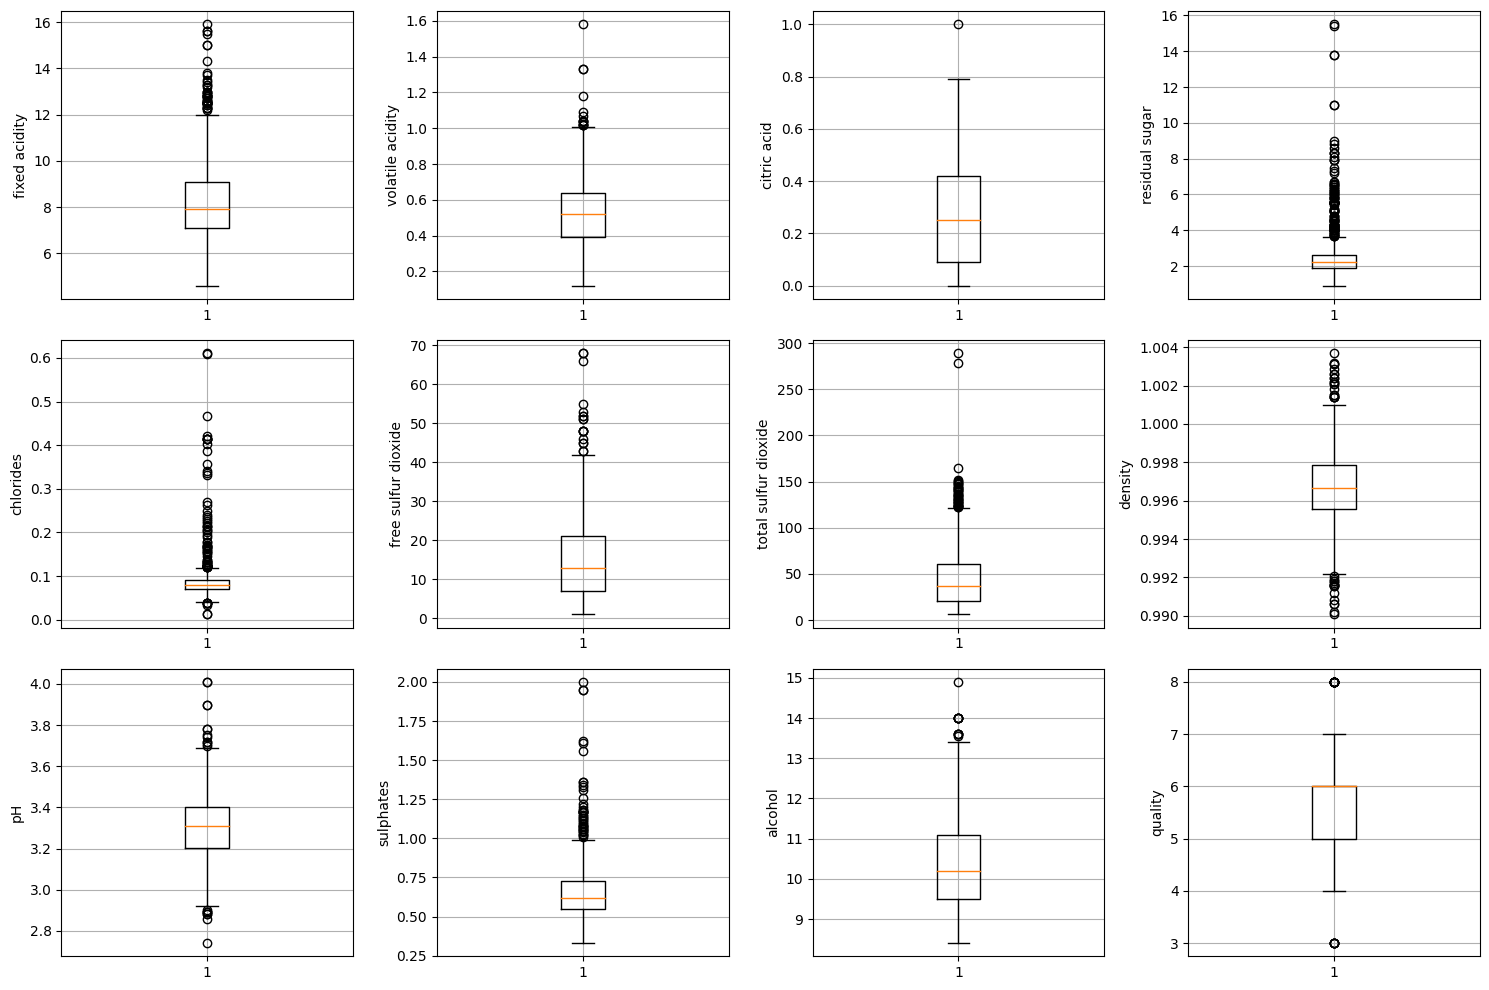

In [10]:
columnas = df.select_dtypes([np.number]).columns
n = 1
plt.figure(figsize=(15,10), dpi=100)
for columna in columnas:
  plt.subplot(3,4,n)
  n = n+1
  plt.ylabel(columna)
  plt.boxplot(df[columna])
  plt.grid(True)
  plt.tight_layout()

In [11]:
columnas = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH']
for columna in columnas:
  Q1 = df[columna].quantile(0.25)
  Q3 = df[columna].quantile(0.75)
  IQR = Q3 - Q1
  filtroOutlierAbajo = df[columna] < (Q1 - 1.5 * IQR)
  filtroOutlierArriba = df[columna] > (Q3 + 1.5 * IQR)
  print(f"\nLímite inferior: {Q1 - 1.5 * IQR}")
  print(f"Límite Superior: {Q3 + 1.5 * IQR}")
  indicesALimpiarAbajo = df.loc[filtroOutlierAbajo].index
  indicesALimpiarArriba = df.loc[filtroOutlierArriba].index
  df.loc[indicesALimpiarAbajo, columna] = Q1 - 1.5 * IQR
  df.loc[indicesALimpiarArriba, columna] = Q3 + 1.5 * IQR

df.describe().round(3)


Límite inferior: 4.1
Límite Superior: 12.1

Límite inferior: 0.021250000000000047
Límite Superior: 1.01125

Límite inferior: 0.8499999999999996
Límite Superior: 3.6500000000000004

Límite inferior: 0.04000000000000002
Límite Superior: 0.11999999999999998

Límite inferior: -14.0
Límite Superior: 42.0

Límite inferior: -39.0
Límite Superior: 121.0

Límite inferior: 0.9921574999999999
Límite Superior: 1.0012575

Límite inferior: 2.9125000000000005
Límite Superior: 3.6925


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.00,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000
mean,8.27,0.530,0.268,2.323,0.081,15.463,45.127,0.997,3.310,0.658,10.442,5.657
std,1.63,0.174,0.197,0.610,0.018,9.726,29.975,0.002,0.152,0.170,1.082,0.806
min,4.60,0.120,0.000,0.900,0.040,1.000,6.000,0.992,2.913,0.330,8.400,3.000
25%,7.10,0.392,0.090,1.900,0.070,7.000,21.000,0.996,3.205,0.550,9.500,5.000
50%,7.90,0.520,0.250,2.200,0.079,13.000,37.000,0.997,3.310,0.620,10.200,6.000
75%,9.10,0.640,0.420,2.600,0.090,21.000,61.000,0.998,3.400,0.730,11.100,6.000
max,12.10,1.011,1.000,3.650,0.120,42.000,121.000,1.001,3.692,2.000,14.900,8.000


Visualización de los datos luego de limpieza de outliers

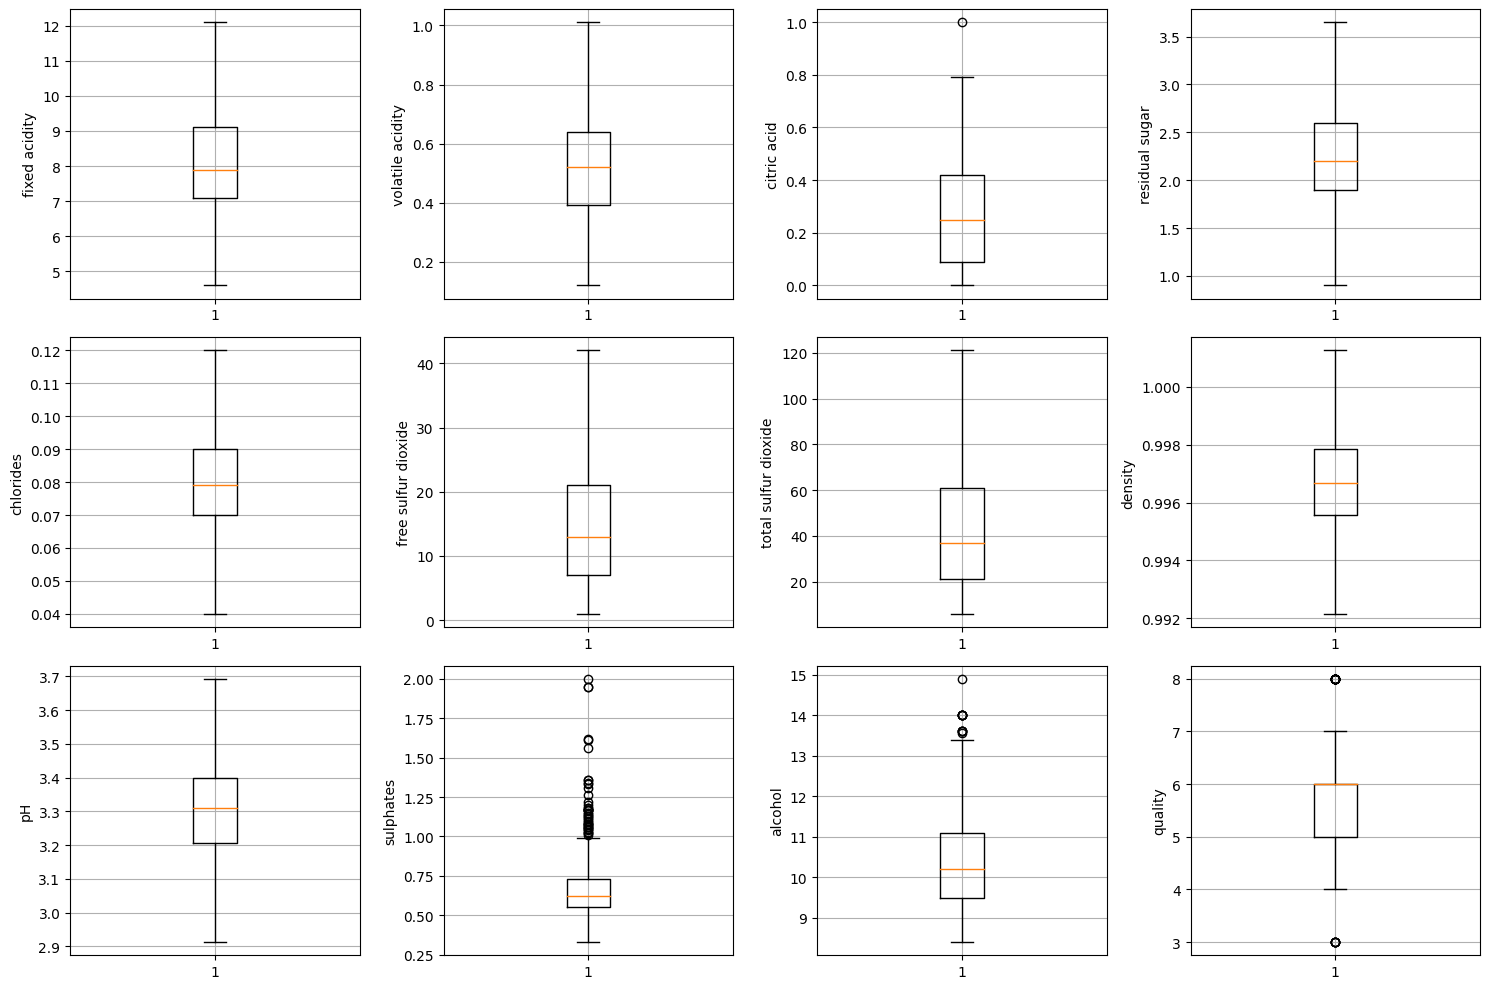

In [12]:
#https://interactivechaos.com/es/manual/tutorial-de-matplotlib/la-funcion-subplots
# Creación de variables que contiene del DataFrame valores numéricos
columnas = df.select_dtypes([np.number]).columns
n = 1
#Creación del gráfico
plt.figure(figsize=(15,10), dpi=100)
# Bucle for para que se realice un gráfico en cada columna y se genere un boxplot
for columna in columnas:
  plt.subplot(3,4,n)
  n = n+1
  plt.ylabel(columna)
  plt.boxplot(df[columna])
  plt.grid(True)
  plt.tight_layout()

 2. Preprocesamiento de Datos:

Seleccionar características importantes para la clasificación.


Transformar variables categóricas en variables numéricas si es necesario.


Dividir los datos en conjuntos de entrenamiento y prueba.


Escalar las características.

In [13]:
# Se determina el target 'quality'
X = df.drop(columns= 'quality')
y = df['quality']
# División de la data en conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=77)

In [14]:
#Definición de las categorías numérica ya que el Dataset no tiene características categóricas

numeric_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [15]:
# Crear transformadores para el subconjunto de columnas

numeric_transformer = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy='mean')),  #Refuerzo de relleno de nulos, si es que los hay
    ('scaler', StandardScaler()) # Escalado de categorías numéricas
])

In [16]:
# Crear un ColumnTransformer, es decir transformación de las columnas.
preprocessor = ColumnTransformer(transformers=[
    ('numericas', numeric_transformer, numeric_features)
])

3. Entrenamiento de Modelos de Clasificación:

Entrenar al menos tres modelos de clasificación diferentes (por ejemplo, KNN, RandomForest, y Regresión Logística).


Utilizar validación cruzada para seleccionar los mejores hiperparámetros.

Distribución de las clases de la columna 'target' quality

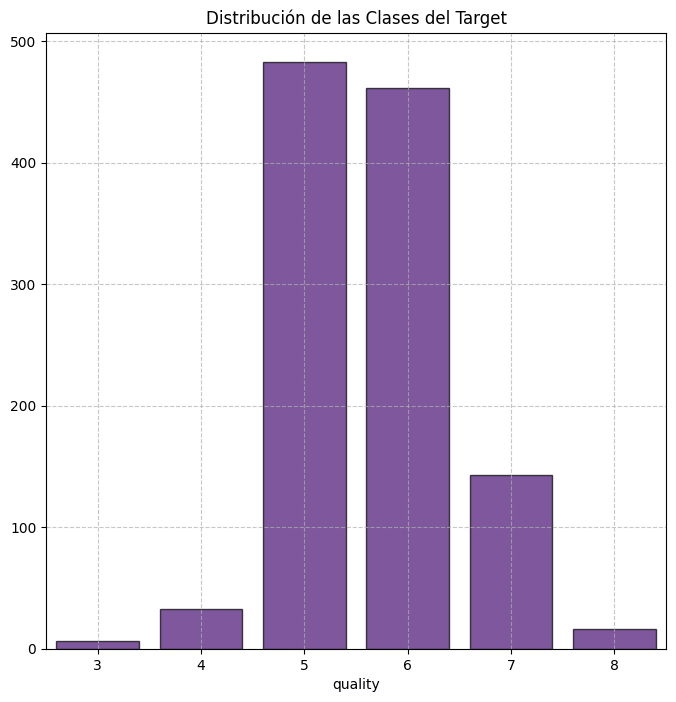

In [17]:
# Ejemplo de visualización de distribución de las clases.
target = df['quality'].value_counts()

# Visualización del conteo de cada categoría

Proporciones = target/ len(df)

# Visualizar del conteo de las categorías
# Generación de código para crear la figura
plt.figure(figsize=(8,8))
sns.barplot(x=target.index, y=target.values, color= 'indigo', edgecolor= 'black', alpha= 0.7)
plt.title("Distribución de las Clases del Target")
plt.grid(True,  linestyle='--', alpha=0.7)
plt.show()

En la distribución de 'quality' se puede apreciar que las clases no están distribuidas en similares proporciones, si no que se evidencia mayor presencia de las categorías '5' y '6'.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, roc_auc_score

# Crear un pipeline que primero preprocesa los datos y luego ajusta el modelo para KNN
modelo_KNN = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=2))
])

In [19]:
# Ajuste del modelo KNN
modelo_KNN.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numericas',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [20]:
y_predKNN = modelo_KNN.predict(X_test)
y_predKNN

array([5, 6, 5, 6, 6, 6, 4, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 4, 6,
       4, 4, 5, 5, 5, 5, 5, 5, 7, 5, 6, 5, 4, 5, 5, 5, 6, 5, 6, 5, 5, 5,
       5, 5, 5, 5, 6, 5, 5, 7, 3, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5,
       6, 6, 5, 5, 6, 3, 6, 5, 6, 6, 5, 4, 6, 5, 4, 5, 5, 5, 5, 6, 5, 5,
       6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 7, 5, 6, 6, 5,
       5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 4, 5, 5, 5, 5, 6, 6, 6, 5,
       5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 7, 6, 5, 6, 5, 5, 5, 6, 5,
       5, 5, 7, 6, 4, 6, 4, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5,
       4, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 7, 5, 5, 5, 6,
       6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 7, 7, 6, 7,
       6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 7, 6, 4, 5, 6, 5, 6, 5, 5, 7,
       3, 5, 5, 5, 6, 6, 7, 5, 5, 6, 5, 6, 5, 5, 5, 7, 5, 5, 6, 5, 5, 5,
       5, 6, 6, 4, 5, 5, 5, 5, 8, 5, 6, 6, 5, 5, 5, 7, 5, 5, 5, 6, 5, 5,
       5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 4,

In [21]:
exactitudKNN = accuracy_score(y_test, y_predKNN)

print(f'Exactitud: {exactitudKNN}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_predKNN))

Exactitud: 0.5014577259475219
Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.22      0.15         9
           5       0.52      0.70      0.60       138
           6       0.52      0.46      0.49       140
           7       0.60      0.18      0.28        50
           8       0.00      0.00      0.00         5

    accuracy                           0.50       343
   macro avg       0.29      0.26      0.25       343
weighted avg       0.52      0.50      0.49       343



KNN tiene menor rendimiento que Random Forest con una exactitud  de 0.5015 es decir que el 50.15% de los casos son clasificados correctamente, el modelo no está aprendiendo lo suficiente de los datos ya que la data está desbalanceada.

En especial tiene grandes problemas con las clases menos representada como '3', '4', '7' y '8'. Se puede identificar que el modelo está obtendiendo una precisión baja lo cual indica que cuando predice por ejemplo '4' solamente el 12% de esas predicciones son correctas (Precisión) y el recall de 0.70 o sea el 70% de los ejemplos de la clase está idenfiticada bien.

F1-score y recall es poco para ciertas clases mientras que el rendimiento es aceptable para clases que tienen mayor soporte.


In [22]:
matrix_confusionKNN = confusion_matrix(y_test, y_predKNN)

print('Matriz de Confusión:')
print(matrix_confusionKNN)

Matriz de Confusión:
[[ 0  0  1  0  0  0]
 [ 0  2  5  2  0  0]
 [ 3  9 97 28  1  0]
 [ 0  5 66 64  5  0]
 [ 0  1 14 25  9  1]
 [ 0  0  2  3  0  0]]


Gráfico de matriz de confusión

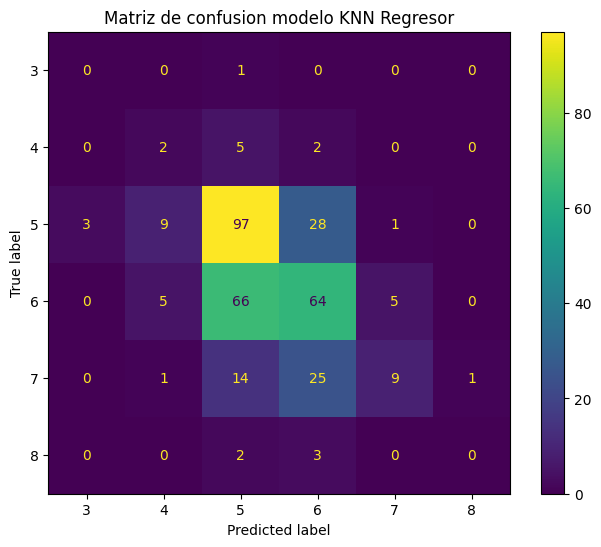

In [23]:
matriz_cKNN = ConfusionMatrixDisplay(confusion_matrix= matrix_confusionKNN, display_labels=[3, 4, 5, 6, 7, 8])
fig, ax=plt.subplots(figsize=(8,6))
matriz_cKNN.plot(ax=ax)
plt.title('Matriz de confusion modelo KNN Regresor')
plt.show()

Utilizar validación cruzada para seleccionar los mejores hiperparámetros.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

Mejor valor de K: 1


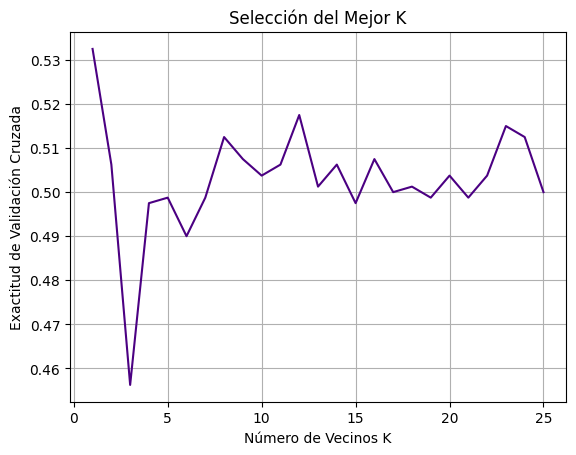

In [24]:
# Selección del mejor K
from sklearn.model_selection import cross_val_score

# Probar diferentes valores de K
valores_k = range(1, 26)
cv_scores = []

for k in valores_k:
    modelo_KNN = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(modelo_KNN, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Seleccionar el K con la mayor exactitud
optimal_k = valores_k[cv_scores.index(max(cv_scores))]
print(f'Mejor valor de K: {optimal_k}')

# Gráfico de la exactitud en función de K
plt.plot(valores_k, cv_scores, color= 'indigo')
plt.xlabel('Número de Vecinos K')
plt.ylabel('Exactitud de Validación Cruzada')
plt.title('Selección del Mejor K')
plt.grid(True)
plt.show()

Modelo Desicion Random Forest

In [25]:
# Crear un pipeline que primero preprocesa los datos y luego ajusta el modelo para Random Forest
modelo_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(max_depth=15, n_estimators=100))
])

In [26]:
# Ajuste del modelo Random Forest
modelo_RF.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numericas',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('classifier', RandomForestClassifier(max_depth=15))])

In [27]:
y_predRF = modelo_RF.predict(X_test)
y_predRF

array([5, 7, 5, 6, 6, 7, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6,
       6, 6, 5, 5, 6, 5, 6, 5, 7, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5,
       5, 5, 5, 5, 6, 5, 6, 7, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 7, 6,
       6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6,
       6, 7, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 6, 6, 5, 6, 6, 6, 7, 6, 5, 6, 6, 5, 6, 6, 5, 7, 6, 6, 7,
       6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 5, 5, 6, 5,
       5, 6, 7, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5,
       5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5,
       7, 6, 6, 5, 6, 6, 6, 5, 5, 5, 7, 6, 5, 6, 5, 6, 6, 6, 6, 7, 6, 7,
       6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 6, 7, 6, 5, 7,
       5, 6, 5, 6, 7, 6, 7, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5,
       6, 5, 6, 6, 6, 6, 7, 5, 8, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5,
       6, 5, 6, 5, 7, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,

- Evaluar los modelos utilizando métricas como exactitud, precisión, recall, F1-Score y matriz de confusión.

Evaluación del modelo Random Forest

In [28]:
exactitudRF = accuracy_score(y_test, y_predRF)

print(f'Exactitud: {exactitudRF}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_predRF))

Exactitud: 0.6180758017492711
Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.71      0.70      0.70       138
           6       0.55      0.71      0.62       140
           7       0.67      0.32      0.43        50
           8       0.00      0.00      0.00         5

    accuracy                           0.62       343
   macro avg       0.32      0.29      0.29       343
weighted avg       0.61      0.62      0.60       343



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Se puede ver que la Exactitud (accuracy) tiene un porcentaje de 62.39% con predicciones correctas, la precisión para la clase '5' es 70% en el que el modelo predijo la clase correctamente, mientras que en ''3', '4' y '8' no tuvo precisión, recall el modelo detecta correctamente la clase '6' pero en las las otras obtiene un bajo nivel, F1-score se evidencia que no hay una buena media armónica entre la precision y recall ya que sólo da resultados para '5', '6' y '7' en las otras no tiene buen resultado y Support se puede apreciar que no hay un buen soporte de datos en el conjunto de prueba.

En términos generales el modelo presenta dificultades para predecir adecuadamente las clases que se encuentran en menor proporción.

Matriz de confusión modelo Random Forest

In [29]:
matrix_confusionRF = confusion_matrix(y_test, y_predRF)

print('Matriz de Confusión:')
print(matrix_confusionRF)

Matriz de Confusión:
[[  0   0   0   1   0   0]
 [  0   0   5   4   0   0]
 [  0   0  96  42   0   0]
 [  0   0  32 100   8   0]
 [  0   0   3  30  16   1]
 [  0   0   0   5   0   0]]


Gráfico matriz de confusión modelo Random Forest

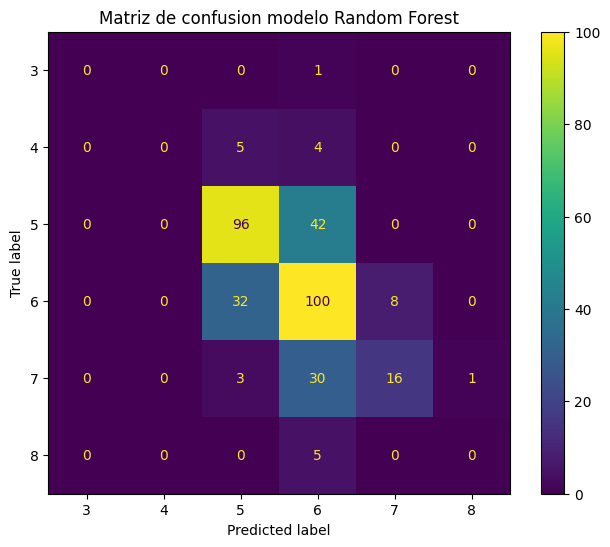

In [30]:
matriz_cRF = ConfusionMatrixDisplay(confusion_matrix= matrix_confusionRF, display_labels=[3, 4, 5, 6, 7, 8])
fig, ax=plt.subplots(figsize=(8,6))
matriz_cRF.plot(ax=ax)
plt.title('Matriz de confusion modelo Random Forest')
plt.show()

Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.

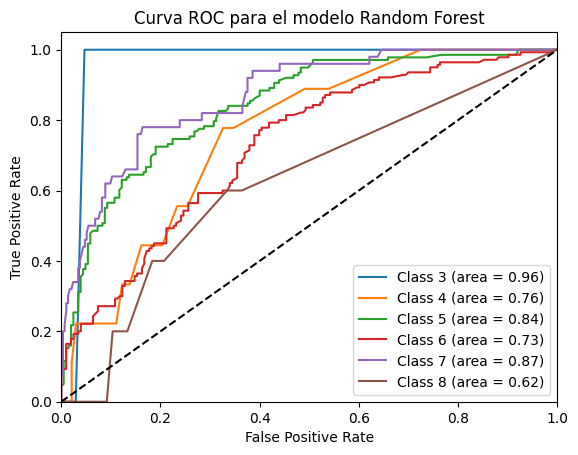

In [31]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score

# Definir los nombres de las clases
clases = [3, 4, 5, 6, 7, 8]

# Binarizar las etiquetas de prueba
y_test_bin = label_binarize(y_test, classes=clases)

# Calcular las probabilidades de predicción

y_probRF = modelo_RF.predict_proba(X_test)

# Calcular la curva ROC
# Calcular y plotear la curva ROC para cada clase
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probRF[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_probRF[:, i])
    plt.plot(fpr, tpr, label=f'Class {clases[i]} (area = %0.2f)' % auc)

# Plotear la curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para el modelo Random Forest')
plt.legend(loc="lower right")
plt.show()

La curva anterior enfrenta lo que es falsa alarma contra la tasa de éxito, el área bajo la curva representa el rendimiento de cada una de las clases; clase '3' tiene un 0.93 lo que indica que el modelo tiene un rendimiento perfecto, clase '4' disminuye comparado con la clase anterior, clase '5' de 0.83 un rendimiento casi perfecto, clase '6' similar al rendimiento de la clase '4' es decir que es bueno pero que tiene ciertas fallas para la predicción de estos al igual que sucede con la clase '8' y por último la clase '7' es el segundo valor con mejor rendimiento, como conclusión en términos generales el modelo funciona con valores muy cercanos a 1 lo que indica un buen rendimiento para predecir el tipo de clase.

Utilizar validación cruzada para seleccionar los mejores hiperparámetros.

In [49]:
# Optimización del modelo Random Forest

from sklearn.model_selection import GridSearchCV

# Crear un pipeline que primero preprocesa los datos y luego ajusta el modelo para Random Forest
modelo_RF1 =  Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Definir el grid de hiperparámetros para encontrar el que mejor modele el RF
param_RF = {
    'classifier__n_estimators': [50, 100, 200],  # Número de árboles
    'classifier__max_depth': [5, 10, 15],  # Profundidad máxima
}


In [50]:
# Definir el GridSearchCV para el modelo RF
grid_RF = GridSearchCV(estimator= modelo_RF1, param_grid=param_RF, cv=5, n_jobs=-1, verbose=2)

# Ajustar el grid search a los datos de entrenamiento
grid_RF.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numericas',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['fixed '
                                                                          'acidity',
                                                                          'volatile '
                                                                          'acidity',
                                                                          'citric '
                                                                          'acid',
                                                                          'residual '
                                                                          'sugar',
                                                                          'chlorides',
                                                                          'free '
                                                                          'sulfur '
                                                                          'dioxide',
                                                                          'total '
                                                                          'sulfur '
                                                                          'dioxide',
                                                                          'density',
                                                                          'pH',
                                                                          'sulphates',
                                                                          'alcohol'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [5, 10, 15],
                         'classifier__n_estimators': [50, 100, 200]},
             verbose=2)

In [42]:
# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_RF.best_params_)

# Usar el mejor modelo para hacer predicciones del modelo
best_rf = grid_RF.best_estimator_
y_pred_RFop = best_rf.predict(X_test)

# Evaluar el rendimiento del modelo RF
print(classification_report(y_test, y_pred_RFop))

Mejores hiperparámetros: {'classifier__max_depth': 10, 'classifier__n_estimators': 50}
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.73      0.72      0.72       138
           6       0.55      0.72      0.63       140
           7       0.67      0.32      0.43        50
           8       0.00      0.00      0.00         5

    accuracy                           0.63       343
   macro avg       0.32      0.29      0.30       343
weighted avg       0.62      0.63      0.61       343



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Se puede ver reflejada la mejora que se tiene al optimizar los parámetros del modelo, se aprecian métricas de rendimiento con valores más altos. Este modelo presenta optimización con la búsqueda de lo mejores parámetros y se puede evidenciar en ambos casos, sin optimizar y optimizado.

Conclusión:

Modelo Regresión Logística

In [43]:
# Crear un pipeline que primero preprocesa los datos y luego ajusta el modelo Regresión Logística
modelo_Lo = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l2',           # Tipo de regularización L2 (Ridge)
C=1.0,                   # Inverso de la fuerza de regularización
solver='lbfgs',          # Algoritmo para la optimización
max_iter=100,            # Número máximo de iteraciones
tol=1e-4,                # Tolerancia para el criterio de parada
random_state=42))         # Semilla para la reproducibilidad
])

In [44]:
# Ajuste del modelo Regresión Logística
modelo_Lo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numericas',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [45]:
y_predLo = modelo_Lo.predict(X_test)
y_predLo

array([5, 6, 5, 6, 6, 7, 6, 6, 7, 5, 5, 6, 5, 5, 5, 7, 6, 7, 6, 5, 6, 6,
       5, 5, 6, 5, 6, 5, 6, 5, 7, 5, 6, 5, 5, 6, 5, 6, 7, 5, 6, 5, 6, 6,
       5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 7, 7, 6,
       6, 6, 6, 5, 5, 5, 6, 6, 8, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 7, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5,
       5, 5, 6, 6, 6, 5, 6, 6, 7, 6, 6, 5, 6, 5, 5, 7, 6, 6, 5, 6, 6, 6,
       5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 7, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5,
       5, 6, 5, 5, 5, 6, 5, 6, 5, 7, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5,
       6, 7, 6, 6, 6, 6, 6, 5, 5, 5, 7, 6, 5, 6, 5, 6, 7, 5, 7, 7, 6, 7,
       6, 7, 5, 7, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 7, 6, 5, 6, 5, 6,
       5, 5, 5, 6, 7, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5,
       6, 5, 6, 5, 6, 6, 7, 5, 6, 5, 6, 5, 5, 5, 6, 7, 5, 7, 5, 6, 5, 5,
       6, 5, 5, 5, 7, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5,

- Evaluar los modelos utilizando métricas como exactitud, precisión, recall, F1-Score y matriz de confusión.

In [46]:
exactitud_Lo = accuracy_score(y_test, y_predLo)

print(f'Exactitud: {exactitud_Lo}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_predLo))

Exactitud: 0.577259475218659
Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.65      0.72      0.68       138
           6       0.53      0.60      0.56       140
           7       0.50      0.30      0.37        50
           8       0.00      0.00      0.00         5

    accuracy                           0.58       343
   macro avg       0.28      0.27      0.27       343
weighted avg       0.55      0.58      0.56       343



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Para la exactitud mide el porcentaje de predicciones correctas en relación con el total de predicciones realizadas es de 57.73% de las predicciones del modelo son correctas pero también se encuentra lejos de estar preciso debido al desbalance de la data.

Presenta un rendimiento con mejores métricas para las clases '5' y '6' que son las que estan en mayor proporción en el dataset pero presenta grandes dificultades para clasificar correctamente las clases con menor proporción como las clases '3', '4', '7' y '8' lo que evidencia el desbalance lo cual está afectando el rendimiento del modelo en especial en aquellas clases menos freucentes.

- Evaluar los modelos utilizando métricas como exactitud, precisión, recall, F1-Score y matriz de confusión.

Matriz de confusión Regresión Logística

In [47]:
matrix_confusionRL = confusion_matrix(y_test, y_predLo)

print('Matriz de Confusión:')
print(matrix_confusionRL)

Matriz de Confusión:
[[ 0  0  1  0  0  0]
 [ 0  0  6  3  0  0]
 [ 0  0 99 39  0  0]
 [ 0  0 42 84 13  1]
 [ 0  0  5 30 15  0]
 [ 0  0  0  3  2  0]]


Gráfico matriz de confusión modelo Regresión Logística

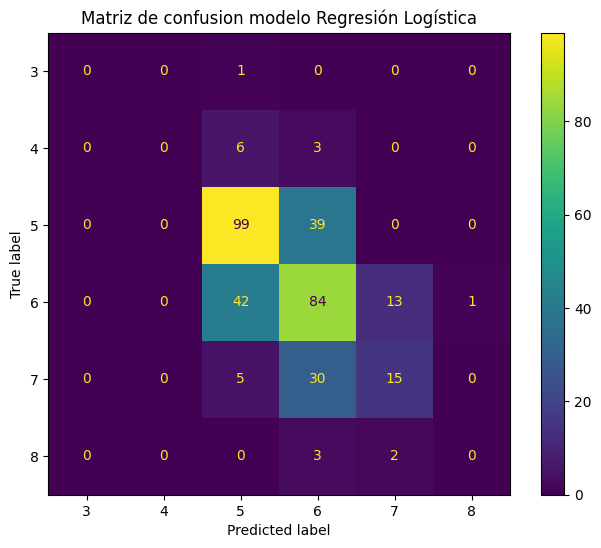

In [48]:
matriz_cReg = ConfusionMatrixDisplay(confusion_matrix= matrix_confusionRL, display_labels=[3, 4, 5, 6, 7, 8])
fig, ax=plt.subplots(figsize=(8,6))
matriz_cReg.plot(ax=ax)
plt.title('Matriz de confusion modelo Regresión Logística')
plt.show()

Optimización del modelo Regresión Logística

In [57]:
# Crear el pipeline que incluye preprocesamiento y el modelo de Regresión Logística
modelo_RL1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))  # Modelo Regresión Logística
])

# Definir el grid de hiperparámetros
param_RL = {
    'classifier__C': [0.1, 1, 10],  # Parámetro de regularización
    'classifier__penalty': ['l1', 'l2'],  # Tipo de regularización
   }

In [58]:
# Definir el GridSearchCV para el modelo de Regresión Lineal
grid_RL = GridSearchCV(estimator=modelo_RL1, param_grid=param_RL, cv=5, n_jobs=-1, verbose=2)

# Ajustar el grid search a los datos de entrenamiento
grid_RL.fit(X_train, y_train)

# Para obtener los mejores hiperparámetros
print(grid_RL.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'classifier__C': 10, 'classifier__penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3

In [60]:
# Obtener el mejor modelo del GridSearchCV
mejor_modelo = grid_RL.best_estimator_

# Hacer predicciones en los datos de prueba
y_predRLop = mejor_modelo.predict(X_test)

# Generar un informe de clasificación completo
print("\nInforme de clasificación Modelo Regresión Logística optimizado:")
print(classification_report(y_test, y_predRLop))


Informe de clasificación Modelo Regresión Logística optimizado:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.64      0.71      0.68       138
           6       0.53      0.60      0.56       140
           7       0.50      0.30      0.37        50
           8       0.00      0.00      0.00         5

    accuracy                           0.57       343
   macro avg       0.28      0.27      0.27       343
weighted avg       0.55      0.57      0.56       343



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Al comparar las métricas con el modelo sin optimizar no se evidencia una mejora, lo que quiere decir que el modelo como estaba anteriormente es la vía mpas adecuada para el proceso.

 5. Análisis y Comparación de Resultados:

Comparar el rendimiento de los diferentes modelos.
Discutir cuál modelo ofrece el mejor rendimiento y por qué.


Identificar las fortalezas y debilidades de cada enfoque en este contexto.

In [56]:
# Métricas del modelo KNN
print('Métricas del modelo KNN')
exactitudKNN = accuracy_score(y_test, y_predKNN)

print(f'Exactitud: {exactitudKNN}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_predKNN))

# Métricas del modelo Random Forest
print('\nMétricas del modelo Random Forest')
exactitudRF = accuracy_score(y_test, y_predRF)

print(f'Exactitud: {exactitudRF}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_predRF))

# Métricas del modelo Regresión Logística
print('\nMétricas del modelo Regresión Logística')
exactitud_Lo = accuracy_score(y_test, y_predLo)

print(f'Exactitud: {exactitud_Lo}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_predLo))


Métricas del modelo KNN
Exactitud: 0.5014577259475219
Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.22      0.15         9
           5       0.52      0.70      0.60       138
           6       0.52      0.46      0.49       140
           7       0.60      0.18      0.28        50
           8       0.00      0.00      0.00         5

    accuracy                           0.50       343
   macro avg       0.29      0.26      0.25       343
weighted avg       0.52      0.50      0.49       343


Métricas del modelo Random Forest
Exactitud: 0.6180758017492711
Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.71      0.70      0.70       138
           6       0.55      0.71      0.62       140
           7   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Conclusión.

Se puede apreciar que el modelo Random Forest tiene la mejor exactitud, lo que significa que clasifica correctamente más instancias en general.

Para la métrica Precision tiene mejor resultado lo que indica que cuando predice una categoría es mucho más probabl de que sea correcta.

Recall para Random Forest lo que quiere decir que identifica apropiadamente las instancias de las clases que predice.

F1-Score presenta mejor resultado que es indicativo que hay un mejor equlibrio entre la precisión y el recall.

Aunque las métricas son buenas para el modelo Random Forest es válido aclarar que la data no presenta una distribución en iguales proporciones lo que se evidencia en los modelos.